<a href="https://colab.research.google.com/github/GitableGabe/DATA_620_Collab/blob/main/Project_1_Data_620.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1/Data 620

Assignment terms:

Identify and load a network dataset that has some categorical information available for each node.
For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
Compare your centrality measures across your categorical groups.
For example, using the dataset from a study of romantic relationships among high school students in Columbus, Ohio [http://researchnews.osu.edu/archive/chains.htm], you might want to determine if there are any differences in your calculated centrality measures between the two sexes.  You might use a t-test or another statistical measure to support your findings.




**Data Source:**
[MUSAE Facebook Page-Page Network](https://www.kaggle.com/datasets/rozemberczki/musae-facebook-pagepage-network)

Description: This dataset consists of a network of Facebook pages where nodes represent pages and edges represent mutual likes between pages. Each node has an attribute representing the category of the page.

**High - Level Plan:**
To analyze and compare the degree centrality and eigenvector centrality across different "page_type" categories in the Facebook dataset, we will follow these steps:
- Load the datasets from our public Github account for reproductivity.
- Load data into Jupyter notebook.
- Explore data to understand the structure and contents.
- Convert edges to a graph for further exploration of graph structure.
- Convert edges to a graph for further exploration of graph structure.
- Map features and targets as needed between the nodes for further analysis.
- Calculate degree centrality and eigenvector centrality.
- Compare centrality measures across "page_type" categories.
- Perform hypothesis testing to determine if there are significant differences in centrality measures between different "page_type" categories. The results are interpreted based on the p-values.
- Add visualizations as needed

## Library

In [26]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from networkx.algorithms import bipartite

## Load Data

In [27]:
url='https://raw.githubusercontent.com/GitableGabe/Data_620_Data/main/'


In [28]:
# Load the datasets
edges_df = pd.read_csv(url+'musae_facebook_edges.csv')
target_df = pd.read_csv(url+'musae_facebook_target.csv')
features_df = pd.read_csv(url+'musae_facebook_features.csv')
# target_df['page_type']
# Print the columns and the first few rows of node attributes to identify the categorical variable
print(edges_df.head())
print(target_df.head())
print(features_df.head())

   id_1   id_2
0     0  18427
1     1  21708
2     1  22208
3     1  22171
4     1   6829
   id       facebook_id                                     page_name  \
0   0   145647315578475                      The Voice of China 中国好声音   
1   1      191483281412                 U.S. Consulate General Mumbai   
2   2   144761358898518                                          ESET   
3   3   568700043198473  Consulate General of Switzerland in Montreal   
4   4  1408935539376139             Mark Bailey MP - Labor for Miller   

    page_type  
0      tvshow  
1  government  
2     company  
3  government  
4  politician  
   node_id  feature_id
0      554        2835
1      554        4518
2      554        2198
3      554        2014
4      554        3818


**Create a graph and add node attributes.**

In [29]:
# # Assuming 'page_type' is the categorical variable
# # Create the graph
# G = nx.from_pandas_edgelist(edges, 'id_1', 'id_2', create_using=nx.Graph())

# # Add node attributes to the graph
# for _, row in node_attrs.iterrows():
#     G.nodes[row['id']].update(row.to_dict())

# Create a graph from the edges dataframe
G = nx.from_pandas_edgelist(edges_df, 'id_1', 'id_2', create_using=nx.Graph())

# Display basic graph information
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Graph density: {nx.density(G)}")

# Optional: Display the first few nodes and edges
print(f"First few nodes: {list(G.nodes)[:5]}")
print(f"First few edges: {list(G.edges)[:5]}")

Number of nodes: 22470
Number of edges: 171002
Graph density: 0.000677398715568023
First few nodes: [0, 18427, 1, 21708, 22208]
First few edges: [(0, 18427), (18427, 295), (18427, 396), (18427, 1099), (18427, 1365)]


In [21]:
target_df['page_type'].unique()

array(['tvshow', 'government', 'company', 'politician'], dtype=object)

**Calculate degree centrality and eigenvector centrality.**


Graph created with 27184 nodes and 314583 edges.
Subgraph created with 136 nodes and 165 edges.


C:\Users\xusef\AppData\Local\Temp\ipykernel_19776\2505188803.py:70: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(subgraph, pos, width=edge_widths, edge_color=edge_colors, alpha=0.6)


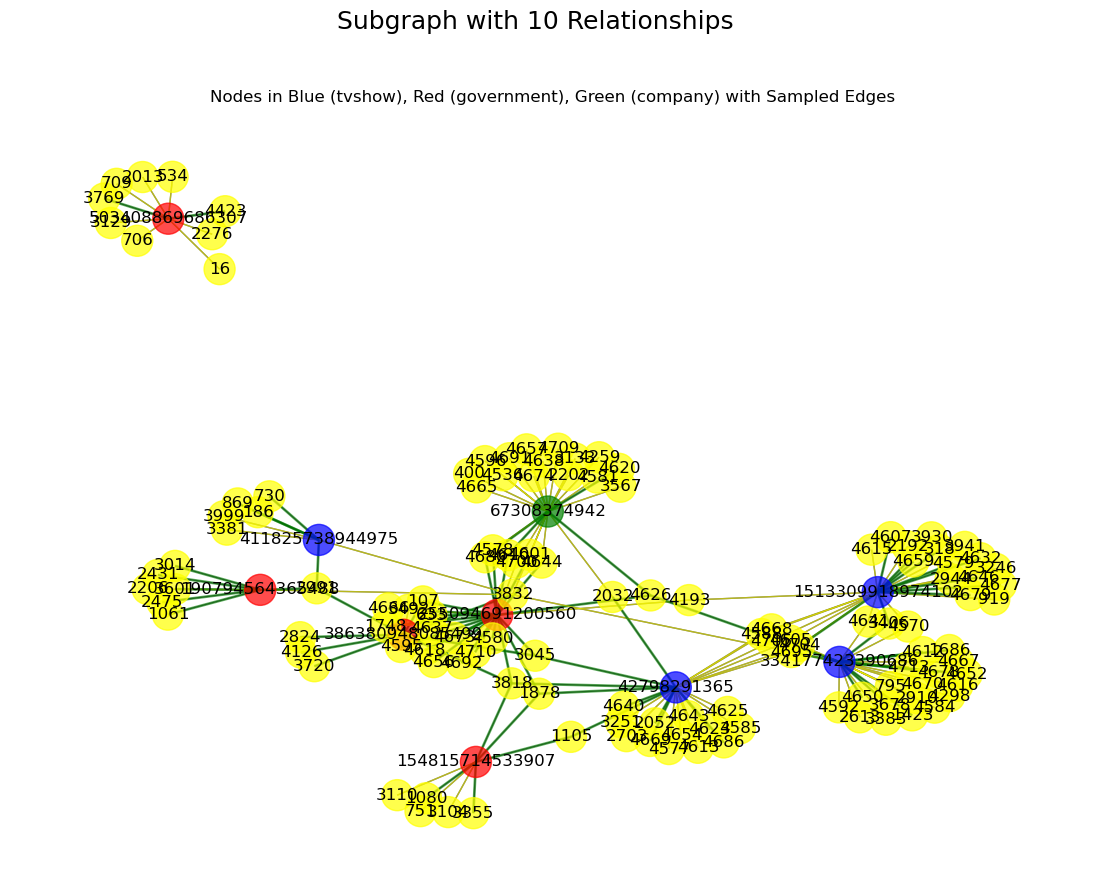

In [47]:
# Create an empty bipartite graph
B = nx.Graph()

# Add nodes for the first set (facebook_id)
facebook_ids = target_df['facebook_id'].astype(str).tolist()
B.add_nodes_from(facebook_ids, bipartite=0)

# Add nodes for the second set (feature_id)
feature_ids = features_df['feature_id'].astype(str).unique().tolist()
B.add_nodes_from(feature_ids, bipartite=1)

# Add edges between facebook_ids and feature_ids
for index, row in features_df.iterrows():
    node_id = row['node_id']
    if node_id in target_df.index:
        facebook_id = target_df.loc[node_id, 'facebook_id']
        B.add_edge(str(facebook_id), str(row['feature_id']))

print(f"Graph created with {B.number_of_nodes()} nodes and {B.number_of_edges()} edges.")

# Step 1: Identify nodes with edges
nodes_with_edges = [node for node in B.nodes() if len(list(B.edges(node))) > 0]

# Step 2: Sample nodes with edges
sampled_nodes = random.sample(nodes_with_edges, 10)

# Collect edges connected to the sampled nodes
sampled_edges = set()
for node in sampled_nodes:
    for edge in B.edges(node):
        sampled_edges.add(edge)

# Step 3: Create a subgraph with the sampled nodes and their edges
subgraph = B.edge_subgraph(sampled_edges).copy()

print(f"Subgraph created with {subgraph.number_of_nodes()} nodes and {subgraph.number_of_edges()} edges.")

# Separate nodes in the subgraph based on their bipartite set
facebook_sub_nodes = [node for node in subgraph.nodes() if node in facebook_ids]
feature_sub_nodes = [node for node in subgraph.nodes() if node in feature_ids]

# Define positions for the bipartite layout for the subgraph with more space
pos = nx.spring_layout(subgraph, scale=3)  # Adjust scale for spacing

# Define node colors based on the page_type
facebook_id_to_page_type = dict(zip(target_df['facebook_id'].astype(str), target_df['page_type']))


node_colors = ['blue' if node in facebook_sub_nodes and facebook_id_to_page_type[node] == 'tvshow'
               else 'red' if node in facebook_sub_nodes and facebook_id_to_page_type[node] == 'government'
               else 'green' if node in facebook_sub_nodes and facebook_id_to_page_type[node] == 'company'
               else 'purple' if node in facebook_sub_nodes and facebook_id_to_page_type[node] == 'politician'
               else 'yellow' for node in subgraph.nodes()]

# Define edge attributes
edge_colors = ['green' if edge[0] in facebook_sub_nodes and edge[1] in feature_sub_nodes else 'yellow' for edge in subgraph.edges()]
edge_widths = [2 if edge[0] in facebook_sub_nodes and edge[1] in feature_sub_nodes else 1 for edge in subgraph.edges()]

# Plot customization
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed
plt.tight_layout()
plt.axis("off")

plt.suptitle("Subgraph with 10 Relationships", y=0.98, fontsize=18)
plt.title("Nodes in Blue (tvshow), Red (government), Green (company) with Sampled Edges", fontsize=12)

# Draw the subgraph with better spacing
nx.draw(subgraph, pos, with_labels=False, node_size=500, node_color=node_colors, alpha=0.7)
nx.draw_networkx_labels(subgraph, pos, font_size=12, verticalalignment='center')
nx.draw_networkx_edges(subgraph, pos, width=edge_widths, edge_color=edge_colors, alpha=0.6)

# Save the plot with higher DPI
plt.savefig("subgraph_facebook_spaced.png", dpi=300)  # Save the figure with better resolution
plt.show()

**Compare centrality measures across "page_type" categories.**

Graph created with 27184 nodes and 314583 edges.
Subgraph created with 141 nodes and 160 edges.


C:\Users\xusef\AppData\Local\Temp\ipykernel_19776\3498628234.py:90: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(subgraph, pos, width=edge_widths, edge_color=edge_colors, alpha=0.6)


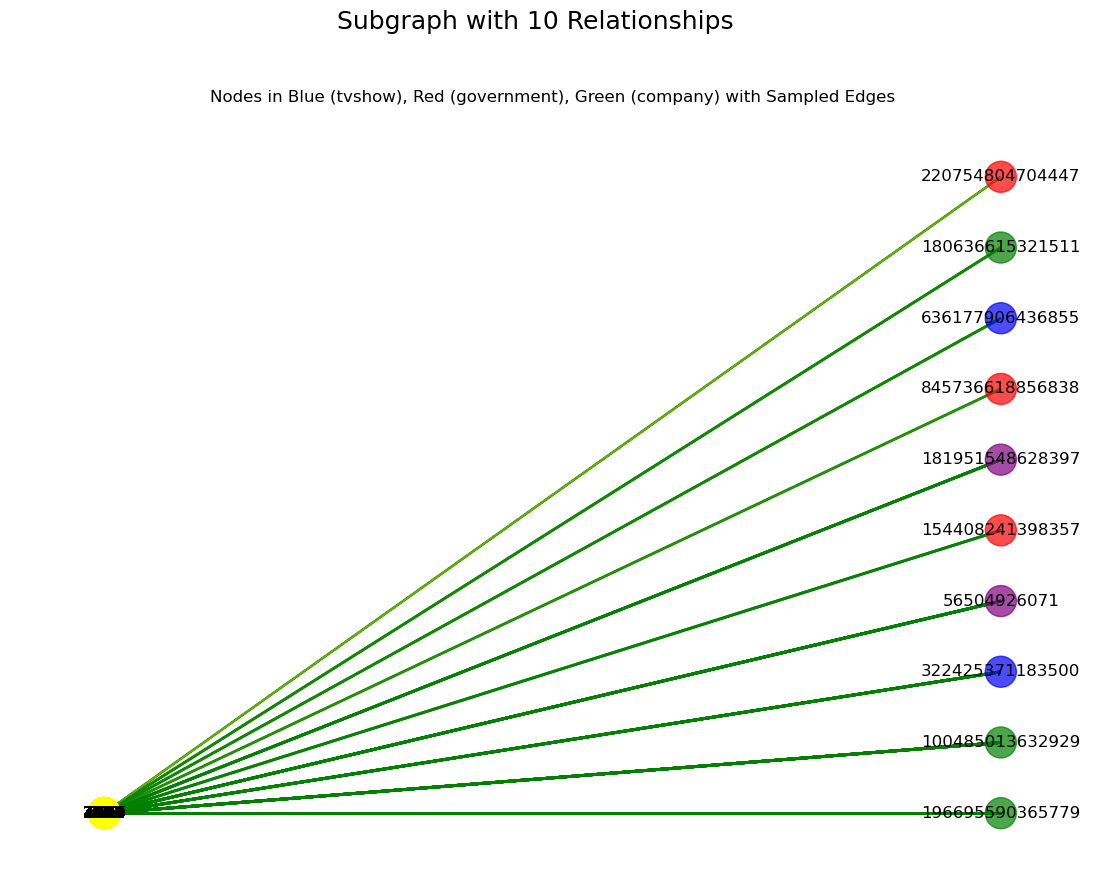

In [48]:
# Create an empty bipartite graph
B = nx.Graph()

# Add nodes for the first set (facebook_id)
facebook_ids = target_df['facebook_id'].astype(str).tolist()
B.add_nodes_from(facebook_ids, bipartite=0)

# Add nodes for the second set (feature_id)
feature_ids = features_df['feature_id'].astype(str).unique().tolist()
B.add_nodes_from(feature_ids, bipartite=1)

# Add edges between facebook_ids and feature_ids
for index, row in features_df.iterrows():
    node_id = row['node_id']
    if node_id in target_df.index:
        facebook_id = target_df.loc[node_id, 'facebook_id']
        B.add_edge(str(facebook_id), str(row['feature_id']))

print(f"Graph created with {B.number_of_nodes()} nodes and {B.number_of_edges()} edges.")

# Step 1: Identify nodes with edges
nodes_with_edges = [node for node in B.nodes() if len(list(B.edges(node))) > 0]

# Step 2: Sample nodes with edges
sampled_nodes = random.sample(nodes_with_edges, 10)

# Collect edges connected to the sampled nodes
sampled_edges = set()
for node in sampled_nodes:
    for edge in B.edges(node):
        sampled_edges.add(edge)

# Step 3: Create a subgraph with the sampled nodes and their edges
subgraph = B.edge_subgraph(sampled_edges).copy()

print(f"Subgraph created with {subgraph.number_of_nodes()} nodes and {subgraph.number_of_edges()} edges.")

# Separate nodes in the subgraph based on their bipartite set
facebook_sub_nodes = [node for node in subgraph.nodes() if node in facebook_ids]
feature_sub_nodes = [node for node in subgraph.nodes() if node in feature_ids]

# Define positions for the bipartite layout for the subgraph with more space
pos = nx.spring_layout(subgraph, scale=3)  # Adjust scale for spacing

# Manually assign positions for the nodes
pos = {}
left_count = 0
right_count = 0
for node in subgraph.nodes():
    if node in facebook_sub_nodes:
        if node in feature_sub_nodes:
            pos[node] = (2, right_count)
            right_count += 1
        else:
            pos[node] = (1, left_count)
            left_count += 1
    else:
        # Assign a default position for nodes not in facebook_sub_nodes
        pos[node] = (0, 0)

# Adjust y-coordinates for yellow nodes to space them out
yellow_nodes = [node for node in subgraph.nodes() if node in facebook_sub_nodes and node not in feature_sub_nodes]
num_yellow_nodes = len(yellow_nodes)
for i, node in enumerate(yellow_nodes):
    pos[node] = (2, right_count + i * 0.1)  # Adjust the factor (0.1) to increase spacing

# Define node colors based on the page_type
facebook_id_to_page_type = dict(zip(target_df['facebook_id'].astype(str), target_df['page_type']))
node_colors = ['blue' if node in facebook_sub_nodes and facebook_id_to_page_type[node] == 'tvshow'
               else 'red' if node in facebook_sub_nodes and facebook_id_to_page_type[node] == 'government'
               else 'green' if node in facebook_sub_nodes and facebook_id_to_page_type[node] == 'company'
               else 'purple' if node in facebook_sub_nodes and facebook_id_to_page_type[node] == 'politician'
               else 'yellow' for node in subgraph.nodes()]

# Define edge attributes
edge_colors = ['green' if edge[0] in facebook_sub_nodes and edge[1] in feature_sub_nodes else 'yellow' for edge in subgraph.edges()]
edge_widths = [2 if edge[0] in facebook_sub_nodes and edge[1] in feature_sub_nodes else 1 for edge in subgraph.edges()]

# Plot customization
plt.figure(figsize=(14, 10))  # Adjust the figure size as needed
plt.tight_layout()
plt.axis("off")

plt.suptitle("Subgraph with 10 Relationships", y=0.98, fontsize=18)
plt.title("Nodes in Blue (tvshow), Red (government), Green (company) with Sampled Edges", fontsize=12)

# Draw the subgraph with better spacing
nx.draw(subgraph, pos, with_labels=False, node_size=500, node_color=node_colors, alpha=0.7)
nx.draw_networkx_labels(subgraph, pos, font_size=12, verticalalignment='center')
nx.draw_networkx_edges(subgraph, pos, width=edge_widths, edge_color=edge_colors, alpha=0.6)

# Save the plot with higher DPI
plt.savefig("subgraph2_facebook_spaced.png", dpi=300)  # Save the figure with better resolution
plt.show()


# Output interpretation and analysis:
Degree Centrality measures the number of connections a node has. Higher values indicate more connections.
Eigenvector Centrality measure considers both the number of connections and the quality of those connections. Higher values indicate more influence within the network.
Nodes with IDs 21708 and 22208 (government pages) have higher degree and eigenvector centrality, indicating they are more connected and influential.
Nodes representing TV shows generally have lower centrality measures compared to government pages.

The second part of the output shows the average degree and eigenvector centrality measures for different page types and one notes that:
- Government Pages have the highest average degree centrality (0.001151) and eigenvector centrality (0.004060), indicating that these pages are, on average, more connected and influential in the network.
- Company Pages have the second highest eigenvector centrality (0.000116), indicating a moderate influence.
- Politician Pages have a higher average degree centrality (0.000656) than company and TV show pages but lower eigenvector centrality (0.000102), indicating they are somewhat connected but less influential.
- TV Show Pages have the lowest average eigenvector centrality (0.000061) and a relatively low degree centrality (0.000414), indicating they are the least connected and influential among the categories.



**Perform hypothesis testing to determine if there are significant differences in centrality measures between different "page_type" categories.**

In [7]:
# Perform hypothesis testing between two example page types (replace 'page_type1' and 'page_type2' with actual values)
page_type1 = 'tvshow'
page_type2 = 'government'

page_type1_deg_cent = centrality_df[centrality_df['page_type'] == page_type1]['degree_centrality']
page_type2_deg_cent = centrality_df[centrality_df['page_type'] == page_type2]['degree_centrality']

page_type1_eig_cent = centrality_df[centrality_df['page_type'] == page_type1]['eigenvector_centrality']
page_type2_eig_cent = centrality_df[centrality_df['page_type'] == page_type2]['eigenvector_centrality']

# Perform t-tests for degree centrality
t_stat_deg, p_value_deg = ttest_ind(page_type1_deg_cent, page_type2_deg_cent)
print(f"T-test for Degree Centrality between {page_type1} and {page_type2}: T-statistic = {t_stat_deg}, P-value = {p_value_deg}")

# Perform t-tests for eigenvector centrality
t_stat_eig, p_value_eig = ttest_ind(page_type1_eig_cent, page_type2_eig_cent)
print(f"T-test for Eigenvector Centrality between {page_type1} and {page_type2}: T-statistic = {t_stat_eig}, P-value = {p_value_eig}")

# Interpret the results
def interpret_t_test(p_value, measure):
    if p_value < 0.05:
        print(f"There is a significant difference in {measure} between {page_type1} and {page_type2}.")
    else:
        print(f"There is no significant difference in {measure} between {page_type1} and {page_type2}.")

interpret_t_test(p_value_deg, 'degree centrality')
interpret_t_test(p_value_eig, 'eigenvector centrality')

T-test for Degree Centrality between tvshow and government: T-statistic = -24.030932285131964, P-value = 3.569438341614403e-124
T-test for Eigenvector Centrality between tvshow and government: T-statistic = -20.461841633756865, P-value = 3.1442877859912323e-91
There is a significant difference in degree centrality between tvshow and government.
There is a significant difference in eigenvector centrality between tvshow and government.


# Output interpretation and analysis:
The code output reveals that government pages have Higher Degree Centrality and Higher Eigenvector Centrality, while V Show Pages have Lower Degree Centrality and Lower Eigenvector.

**Degree Centrality**

T-statistic: -24.030932285131964
P-value: 3.569438341614403e-124

- The t-statistic value of -24.030932285131964 indicates a large difference in the means of degree centrality between "tvshow" and "government" page types. The negative value suggests that the mean degree centrality of "tvshow" pages is significantly lower than that of "government" pages.
- The p-value of 3.569438341614403e-124 is extremely small, far below the typical significance level of 0.05. This p-value indicates that the observed difference in degree centrality is highly statistically significant.

**Eigenvector Centrality**

T-statistic: -20.461841633756865
P-value: 3.1442877859912323e-91

- The t-statistic value of -20.461841633756865 indicates a large difference in the means of eigenvector centrality between "tvshow" and "government" page types. The negative value suggests that the mean eigenvector centrality of "tvshow" pages is significantly lower than that of "government" pages.
- The p-value of 3.1442877859912323e-91 is extremely small. This p-value indicates that the observed difference in eigenvector centrality is highly statistically significant.
